In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 5]

# Wczytanie danych z pliku

In [2]:
import csv

with open('in.txt', 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    f_tc = []  # Wartości temperatur *C
    f_c = []  # Wartości ciepła właściwego
    for f_tc_n, f_c_n in reader:
        f_c.append(float(f_c_n))
        f_tc.append(float(f_tc_n))

Text(0, 0.5, '$C_p$')

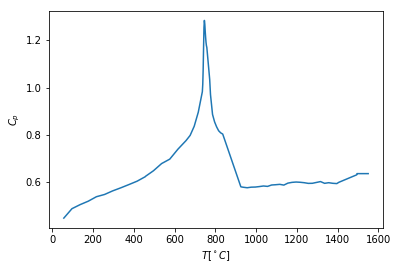

In [3]:
plt.plot(f_tc, f_c)
plt.xlabel('$T[^\circ C]$')
plt.ylabel('$C_p$')

# Temperatrura w Kelwinach

Text(0, 0.5, '$C_p$')

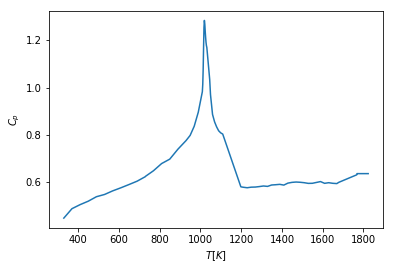

In [4]:
f_t = np.array(f_tc) + 273.15
plt.plot(f_t, f_c)
plt.xlabel('$T[K]$')
plt.ylabel('$C_p$')

# Proste obliczenia sprawdzające

In [5]:
h_proste = [f_t[0]*f_c[0]]
for i in range(1, len(f_c)):
    h_proste.append( h_proste[i-1] + (f_t[i] - f_t[i-1])*(f_c[i] + f_c[i-1])/2 )

Text(0, 0.5, '$C_p$')

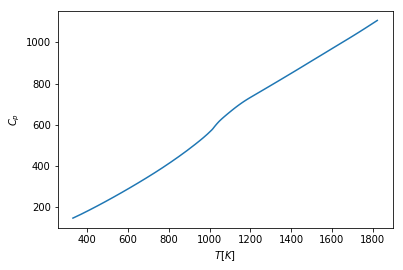

In [6]:
plt.plot(f_t, h_proste)
plt.xlabel('$T[K]$')
plt.ylabel('$C_p$')

In [7]:
for i, v in enumerate(h_proste):
    print("{}: {}".format(i, v))

0: 147.66985599999998
1: 166.41225599999999
2: 186.293456
3: 206.808056
4: 227.99185599999998
5: 249.74325599999997
6: 271.98965599999997
7: 294.799856
8: 318.14545599999997
9: 342.05245599999995
10: 366.62405599999994
11: 367.24856099999994
12: 392.0911709999999
13: 418.6501709999999
14: 446.1911709999999
15: 474.94577099999987
16: 505.27037099999984
17: 521.0157709999999
18: 537.3653709999999
19: 554.6957709999999
20: 573.4875709999999
21: 575.4842409999999
22: 577.5741309999999
23: 579.8202609999998
24: 582.2451909999999
25: 584.7843109999999
26: 587.3372909999999
27: 589.844881
28: 592.2966110000001
29: 594.7011910000001
30: 597.0704810000001
31: 599.418261
32: 601.7392110000001
33: 604.0215310000001
34: 606.2652210000001
35: 608.4702810000001
36: 614.8536810000002
37: 618.8646810000001
38: 628.1518310000001
39: 636.8638810000001
40: 645.3130310000001
41: 653.5734810000001
42: 661.7075310000001
43: 669.7716310000002
44: 677.6845610000001
45: 685.3469510000001
46: 692.7588010000001


# Obliczanie entalpi $H$

In [8]:
import scipy.interpolate

c = scipy.interpolate.interp1d(f_t, f_c)

In [9]:
t_min = f_t[0]
t_max = f_t[-1]
T = np.arange(t_min, t_max+1)

In [10]:
from typing import Callable, Iterable


def calculate_H(c: Callable, h: Callable, T: Iterable):
    # c(t) - Ciepło właściwe w danej temperaturze
    # h(t) - Całkowita dodana entalpia użytkownika w danej temperaturze
    T = iter(T)
    t_0 = next(T)
    H = [c(t_0)*t_0]  # Entalpia
    t_p = t_0  # Poprzednia wartość t
    for t_n in T:
        H.append(
            H[-1] +  # Poprzednia entalpia
            h(t_n) - h(t_p) +  # Wartość dodanej entalpi użytkownika w danej temperaturze
            c((t_n + t_p)/2) * (t_n - t_p)  # Całka C_p * Delta T
        )
        t_p = t_n
    return H

In [11]:
i_t0 = 900  # Temperatura początkowa reakcji
i_t1 = 1200  # Temperatura końcowa reakcji
i_h = 150  # Zadana entalpia
i_td = i_t1 - i_t0

# Zerowa
def h0(T):
    return 0

# Punktowo na początku reakcji
def h1(T):
    if T<i_t0:
        return 0
    else:
        return i_h

# Stała
def h2(T):
    if T<i_t0:
        return 0
    elif T>i_t1:
        return i_h
    else:
        return (T-i_t0)*i_h/i_td


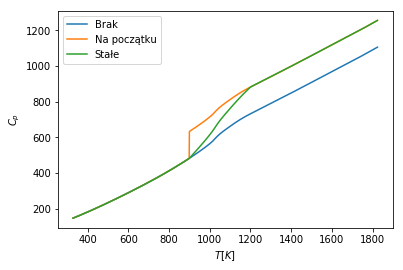

In [12]:
H0 = np.array(calculate_H(c, h0, T))
H1 = np.array(calculate_H(c, h1, T))
H2 = np.array(calculate_H(c, h2, T))

plt.plot(T, H0, label="Brak")
plt.plot(T, H1, label="Na początku")
plt.plot(T, H2, label="Stałe")
plt.xlabel('$T[K]$')
plt.ylabel('$C_p$')
plt.legend()

In [13]:
print("Różnice, powinny być równe {}".format(i_h))
H1[-1] - H0[-1], H2[-1] - H0[-1]

Różnice, powinny być równe 150


(150.0000000000025, 149.9999999999966)

# Jak wyglądaja różnice między między wykresami

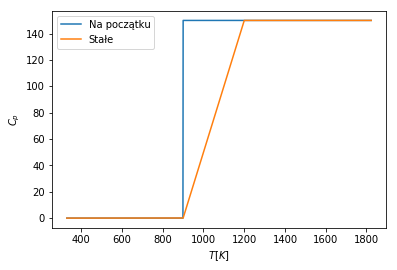

In [14]:
plt.plot(T, H1-H0, label="Na początku")
plt.plot(T, H2-H0, label="Stałe")
plt.xlabel('$T[K]$')
plt.ylabel('$C_p$')
plt.legend()

# Dodatkowo pochodne z funkcji zadanego h przemiany

In [15]:
def calculate_diff(hx):
    d = [None]
    for i in range(1, len(hx)):
        d.append(hx[i] - hx[i-1])
    return d

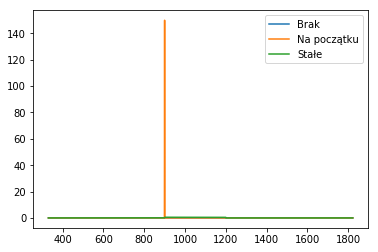

In [17]:
plt.plot(T, calculate_diff([h0(i) for i in T]), label="Brak")
plt.plot(T, calculate_diff([h1(i) for i in T]), label="Na początku")
plt.plot(T, calculate_diff([h2(i) for i in T]), label="Stałe")
plt.legend()

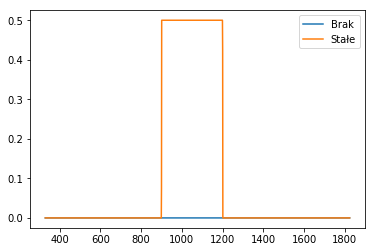

In [18]:
plt.plot(T, calculate_diff([h0(i) for i in T]), label="Brak")
plt.plot(T, calculate_diff([h2(i) for i in T]), label="Stałe")
plt.legend()

# Wartości do sprawdzenia (zawiera interpolacje liniową $C_p$ co 1 stopień)

In [22]:
H0

array([ 147.669856,  148.118994,  148.569128, ..., 1104.491129,
       1105.127779, 1105.764429])

In [23]:
H1

array([ 147.669856,  148.118994,  148.569128, ..., 1254.491129,
       1255.127779, 1255.764429])

In [24]:
H2

array([ 147.669856,  148.118994,  148.569128, ..., 1254.491129,
       1255.127779, 1255.764429])